The required packages are imported.

In [1]:
import networkx as nx
from typing import Union
from typeguard import typechecked
from itertools import combinations, chain
from matplotlib import pyplot as plt

A `State` class is defined that will be added in the form of nodes into the state space graph. It is ensured that object of this class represents the two river banks for a given state. The class is used to create immutable and hashable objects that can be compared against each other.

In [2]:
class State:
    @typechecked
    def __init__(self, 
                 left: Union[list, tuple, set],
                 right: Union[list, tuple, set]):
        self._left = set(left)
        self._right = set(right)
    
    @property
    def left(self):
        return self._left

    @property
    def right(self):
        return self._right
    
    def __eq__(self, other):
        return hash(self) == hash(other)
    
    def __hash__(self):
        left_hash = hash(frozenset(self.left))
        right_hash = hash(frozenset(self.right))
        return left_hash * 10 + right_hash
    
    def __str__(self):
        return "State {\n  left: %s,\n  right: %s\n}" % (self.left, self.right)
    
    def __repr__(self):
        return str(self)

The possible set of items that are to be used in left or right river bank enlisted.

In [3]:
wolf = 'Wolf'
goat = 'Goat'
cabbage = 'Cabbage'
items = set([wolf, goat, cabbage])

To solve the Wolf, Cabbage and Goat problem (a classic river crossing problem), the initial and final states are defined. 

The initial state:
- left river bank: wolf, goat, cabbage
- right river bank: nil

The final state:
- left river bank: nil
- right river bank: wolf, goat, cabbage

In [4]:
init_state = State([wolf, goat, cabbage], [])
init_state

State {
  left: {'Goat', 'Cabbage', 'Wolf'},
  right: set()
}

In [5]:
final_state = State([], [wolf, goat, cabbage])
final_state

State {
  left: set(),
  right: {'Goat', 'Cabbage', 'Wolf'}
}

All possible combinations of the three items are generated in order to be used with the state space.

In [6]:
combos3 = combinations(items, 3)
combos2 = combinations(items, 2)
combos1 = combinations(items, 1)
combos0 = combinations(items, 0)

combos = chain(combos3, combos2, combos1, combos0)

All possible states are generated.

In [7]:
states = [State(left=c, right=items.difference(c)) for c in combos]
states

[State {
   left: {'Goat', 'Cabbage', 'Wolf'},
   right: set()
 },
 State {
   left: {'Goat', 'Cabbage'},
   right: {'Wolf'}
 },
 State {
   left: {'Goat', 'Wolf'},
   right: {'Cabbage'}
 },
 State {
   left: {'Cabbage', 'Wolf'},
   right: {'Goat'}
 },
 State {
   left: {'Goat'},
   right: {'Cabbage', 'Wolf'}
 },
 State {
   left: {'Cabbage'},
   right: {'Goat', 'Wolf'}
 },
 State {
   left: {'Wolf'},
   right: {'Goat', 'Cabbage'}
 },
 State {
   left: set(),
   right: {'Goat', 'Cabbage', 'Wolf'}
 }]

The constraints of the river crossing problem includes:
- same river bank containing the cabbage and goat together is an invalid state
- same river bank containing the wolf and goat together is an invalid state

The states that violate the problem's solution are kept aside.

In [27]:
viol1 = [cabbage, goat]
viol1_diff = items.difference(viol1)
viol2 = [goat, wolf]
viol2_diff = items.difference(viol2)

invalid_states = [
    State(viol1, viol1_diff),
    State(viol1_diff, viol1),
    State(viol2, viol2_diff),
    State(viol2_diff, viol2)
]

A state space (directed) graph is created.

In [78]:
state_space = nx.DiGraph()
state_space.add_nodes_from(states)

A condition check to look for violations in case edge should not be linked basis of given constraint of travel. One item at a time may be traversed across the river bank.

In [79]:
def invalid_check(from_state, to_state):
    cond1 = from_state in invalid_states
    cond2 = to_state in invalid_states
    cond3 = (from_state == init_state) and (to_state == final_state)
    cond4 = len(from_state.left.difference(to_state.left)) != 1 and len(from_state.right.difference(to_state.right)) != 1
    return any([cond1, cond2, cond3,
                cond4])

All possible edge weights and edge links are calculated. It is ensured that no edges are connected to and fro in case of an invalid state.

In [80]:
edges = []
for from_state in states:
    for to_state in states:
        cost = 1e-5
        if invalid_check(from_state, to_state):
            continue
        edges.append((from_state, to_state, cost))

state_space.add_weighted_edges_from(edges)

A helper function that invoked later is created to adjust the plotting margin and keep all text visible.

In [81]:
def adjust_plot_margin():
    plot_margin = 0.5
    x0, x1, y0, y1 = plt.axis()

    plt.axis((x0 - plot_margin,
              x1 + plot_margin,
              y0 - plot_margin,
              y1 + plot_margin))

The graph is plotted and the state space to the given problem is visualised.

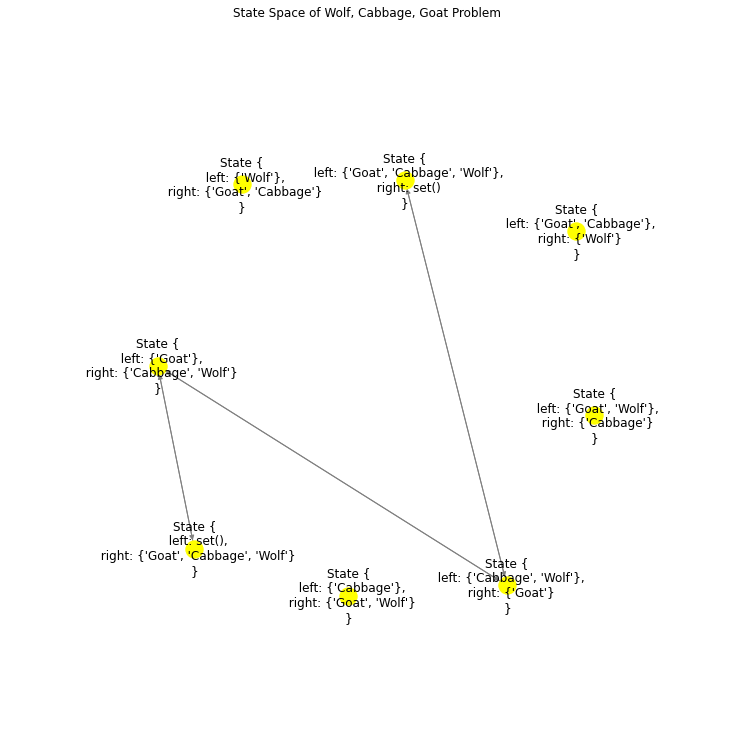

In [85]:
plt.figure(figsize=(10, 10))
nx.draw(state_space, 
        with_labels=True, 
        node_color='yellow',
        edge_color='gray')
adjust_plot_margin()
plt.title('State Space of Wolf, Cabbage, Goat Problem')
plt.show()

Using Djikstra's algorithm the shortest path between given nodes is calculated from the state space graph.

In [86]:
path = nx.algorithms.shortest_path(state_space, init_state, final_state)
path

[State {
   left: {'Goat', 'Cabbage', 'Wolf'},
   right: set()
 },
 State {
   left: {'Cabbage', 'Wolf'},
   right: {'Goat'}
 },
 State {
   left: {'Goat'},
   right: {'Cabbage', 'Wolf'}
 },
 State {
   left: set(),
   right: {'Goat', 'Cabbage', 'Wolf'}
 }]

The shortest path is to be visualised in the form of a path graph.

In [87]:
path_graph = nx.Graph()
path_graph.add_nodes_from(path)

for i in range(1, len(path)):
    path_graph.add_edge(path[i - 1], path[i])

The path graph is plotted which helps visualise one solution to the given problem.

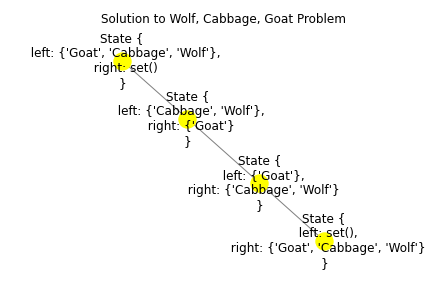

In [90]:
nx.draw(path_graph, with_labels=True, 
        node_color='yellow',
        edge_color='gray')
adjust_plot_margin()
plt.suptitle('Solution to Wolf, Cabbage, Goat Problem')
plt.show()